In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [14]:
datafile = '../input/creditcardfraud/creditcard.csv'

import pandas as pd

data = pd.read_csv (datafile)
data.head ()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [15]:
print (data.shape)
print ('\n')
print (data.info ())

(284807, 31)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64


### Fraud/ non fraud ratio

In [ ]:
print (round (data ['Class'].value_counts ()/data.shape [0],4))
data ['Class'].plot.bar ()

0    0.9983
1    0.0017
Name: Class, dtype: float64


In [17]:
data = data.drop ('Time', axis = 1)

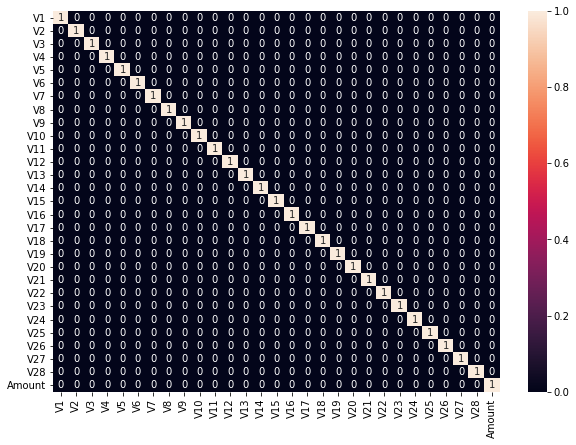

In [18]:
corr = data.iloc [:, :-1].corr ()
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure (figsize = (10,7))
sns.heatmap (corr [corr > 0.5].fillna (0), annot = True)

### No strong correlation between features as shown above

In [19]:
df = pd.DataFrame (index = range (0, len (data.columns [:-1])), columns = ['var', 0, 1])
for i, col in enumerate (data.columns [:-1]):
    df.loc [i,'var'] = col
    df.loc [i,0] = round (abs (data.loc [data ['Class'] == 0, :][col].mean ()),4)
    df.loc [i,1] = round (abs (data.loc [data ['Class'] == 1, :][col].mean ()),4)

### Shown below is the feature wise means for fraud/non fraud cases.

In [ ]:
df ['ratio'] = df [0]*100/df [1]

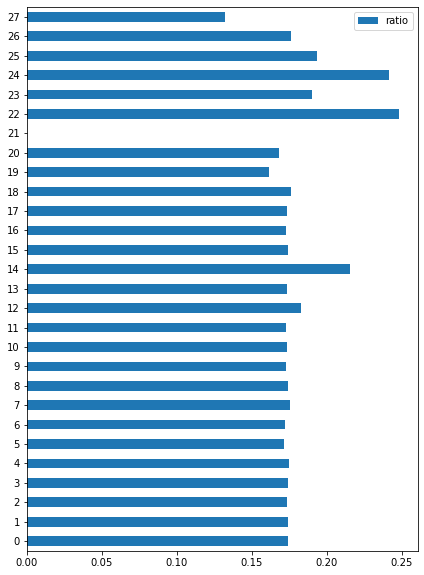

In [37]:
df.iloc [0:28,[0,3]].plot.barh (stacked = True, figsize = (7,10))

### The mean ratios for most of the features of fraud and non-fraud cases are in the same range. However for 'Amount' feature the values are much smaller for the fraud cases.

In [44]:
data.loc [data ['Class'] == 0, 'Amount'].describe ()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [45]:
data.loc [data ['Class'] == 1, 'Amount'].describe ()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

### Normalizing, balancing and splitting data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
y = data ['Class']
X = data.drop ('Class', axis = 1)
X = MinMaxScaler ().fit_transform (X)

from imblearn.over_sampling import SMOTE
method = SMOTE ()

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.3, random_state = 1)

X_resampled, y_resampled = method.fit_resample (X_train, y_train)

### Modeling

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 

In [ ]:
lr = LogisticRegression (max_iter=1000, solver = 'saga', class_weight = 'balanced', random_state=5)
lr.fit (X_resampled,y_resampled)
pred_lr = lr.predict (X_test)

In [ ]:
rf = RandomForestClassifier (class_weight='balanced', random_state=5)
rf.fit (X_resampled,y_resampled)
pred_rf = rf.predict (X_test)

In [ ]:
knn = KNeighborsClassifier ()
knn.fit (X_resampled,y_resampled)
pred_knn = knn.predict (X_test)

### Evaluating

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

In [ ]:
conf_mat_lr = confusion_matrix (y_test, pred_lr)
print ('confusion_matrix_logisticregression','\n', conf_mat_lr)
print ('\n')
class_rep_lr = classification_report (y_test, pred_lr)
print ('classification_report_logisticregression','\n', class_rep_lr)
print ('\n')
roc_lr = roc_auc_score (y_test, pred_lr)
print ('roc_auc_score_lr', '\n', round (roc_lr,4))

In [ ]:
conf_mat_rf = confusion_matrix (y_test, pred_rf)
print ('confusion_matrix_randomforest','\n', conf_mat_rf)
print ('\n')
class_rep_rf = classification_report (y_test, pred_rf)
print ('classification_report_randomforest','\n', class_rep_rf)
print ('\n')
roc_rf = roc_auc_score (y_test, pred_rf)
print ('roc_auc_score_rf', '\n', round (roc_rf,4))

In [ ]:
conf_mat_knn = confusion_matrix (y_test, pred_knn)
print ('confusion_matrix_NearestNeighbor','\n', conf_mat_knn)
print ('\n')
class_rep_knn = classification_report (y_test, pred_knn)
print ('classification_report_NearestNeighbor','\n', class_rep_knn)
print ('\n')
roc_knn = roc_auc_score (y_test, pred_knn)
print ('roc_auc_score_knn', '\n', round (roc_knn,4))

### Ensembling and evaluating

In [ ]:
from sklearn.ensemble import VotingClassifier

ensemble_model = VotingClassifier (estimators=[('lr', lr), ('rf', rf), ('knn', knn)], voting='soft', weights=[1, 5, 1], flatten_transform=True)

ensemble_model.fit (X_resampled,y_resampled)
pred_ens = ensemble_model.predict (X_test)

In [ ]:
conf_mat_ens = confusion_matrix (y_test, pred_ens)
print ('confusion_matrix_ensemble','\n', conf_mat_ens)
print ('\n')
class_rep_ens = classification_report (y_test, pred_ens)
print ('classification_report_ensemble','\n', class_rep_ens)
print ('\n')
roc_ens = roc_auc_score (y_test, pred_ens)
print ('roc_auc_score_ens', '\n', round (roc_ens,4))

### Ensemble method seems to be doing the best in terms of finding faults and non-faults.